In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import os
os.chdir('/content/drive/MyDrive/code/_jupyter-notebooks/calc_feff/v3/Ni-foil_manual')

In [5]:
!chmod +x /content/drive/MyDrive/_others/Colab-stuff/FEFF-on-colab-1/bin/*

In [12]:
cd run

/content/drive/My Drive/code/_jupyter-notebooks/calc_feff/v3/Ni-foil_manual/run


In [13]:
ls

feff.inp


In [14]:
!/content/drive/MyDrive/_others/Colab-stuff/FEFF-on-colab-1/bin/feff.sh

Fri Feb 5 14:27:46 UTC 2021
Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL
Fri Feb 5 14:28:57 UTC 2021


In [15]:
ls

apot.bin              dmdw.inp      feff.out          log6.dat
atoms.dat             edges.dat     ff2x.inp          log.dat
band.inp              eels.inp      files.dat         logeels.dat
chi.dat               emesh.bin     fms.bin           logsfconv.dat
chip0001.dat          emesh.dat     fms.inp           misc.dat
chip0002.dat          feff0001.dat  fort.11           mpse.dat
chip0003.dat          feff0002.dat  fpf0.dat          opcons.inp
chip0004.dat          feff0003.dat  fullspectrum.inp  paths.dat
chip0005.dat          feff0004.dat  genfmt.inp        paths.inp
chip0006.dat          feff0005.dat  geom.dat          phase.bin
chip0007.dat          feff0006.dat  gg.bin            pot.bin
chip0008.dat          feff0007.dat  gg.dat            pot.inp
chip0009.dat          feff0008.dat  global.inp        reciprocal.inp
chip0010.dat          feff0009.dat  gtr.dat           rixs.inp
chip0011.dat          feff0010.dat  hubbard.inp       screen.inp
chip0012.dat          feff0011.dat  l

(8333.0, 8500.0)

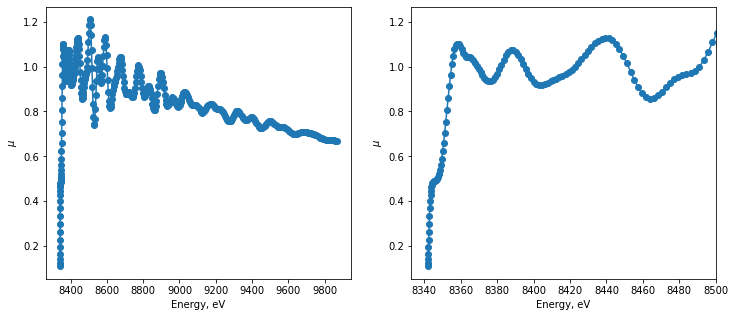

In [25]:
import numpy as np 
from matplotlib import pyplot as plt

def read_xmu(file=None):
    if file is None: file='xmu.dat'
    xmu = np.loadtxt(file, unpack=True, comments='#', usecols=(0,1,3), skiprows=0)
    return xmu

xmu = read_xmu()


fig = plt.figure(figsize=(12,5))

ax = fig.add_subplot('121')
ax.plot(xmu[0],xmu[2],'-o')
ax.set_xlabel('Energy, eV')
ax.set_ylabel('$\mu$')

ax = fig.add_subplot('122')
ax.plot(xmu[0],xmu[2],'-o')
ax.set_xlabel('Energy, eV')
ax.set_ylabel('$\mu$')
ax.set_xlim([8333,8500])

In [26]:
!cp xmu.dat ..

In [27]:
cd ..

/content/drive/My Drive/code/_jupyter-notebooks/calc_feff/v3/Ni-foil_manual


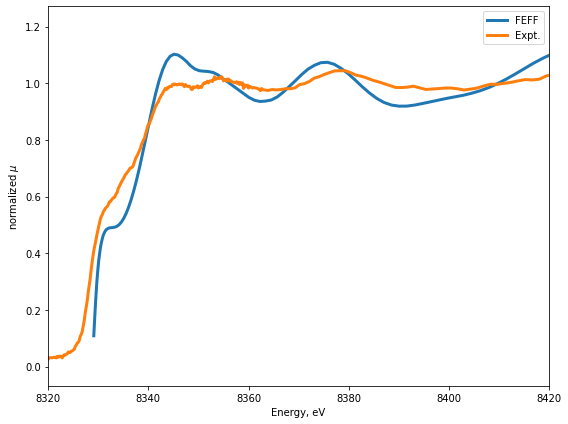

In [36]:
x_sim = np.loadtxt('./run/xmu.dat', unpack=True, comments='#', usecols=(0,1,3), skiprows=0)
x_expt = np.loadtxt('./Ni-RT.nor', unpack=True, comments='#')

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot('111')
ax.plot(x_sim[0]-13, x_sim[2], label="FEFF", linewidth=3)
ax.plot(x_expt[0],x_expt[1], label="Expt.", linewidth=3)
plt.legend(loc="upper right")
plt.xlim(8320, 8420)
plt.xlabel('Energy, eV')
plt.ylabel('normalized $\mu$')
plt.tight_layout()